In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df=pd.read_csv('ipl.csv', encoding='unicode_escape')

In [31]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [32]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [33]:
df.shape

(816, 17)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [35]:
{features for features in df if df[features].isnull().sum()>0}

{'city',
 'eliminator',
 'method',
 'player_of_match',
 'result',
 'result_margin',
 'winner'}

In [36]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [37]:
df.drop('method',inplace=True,axis=1)

In [38]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [40]:
df.shape

(786, 16)

In [41]:
temp=pd.DataFrame({'Winner':df['winner']})
count_wins=temp.value_counts()
count_wins

Winner                     
Mumbai Indians                 118
Chennai Super Kings            103
Kolkata Knight Riders           97
Royal Challengers Bangalore     87
Kings XI Punjab                 82
Rajasthan Royals                79
Delhi Daredevils                65
Sunrisers Hyderabad             63
Deccan Chargers                 29
Delhi Capitals                  17
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64

In [47]:
labels=[x[0] for x in count_wins.keys()]
labels

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Pune Warriors',
 'Rising Pune Supergiant',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

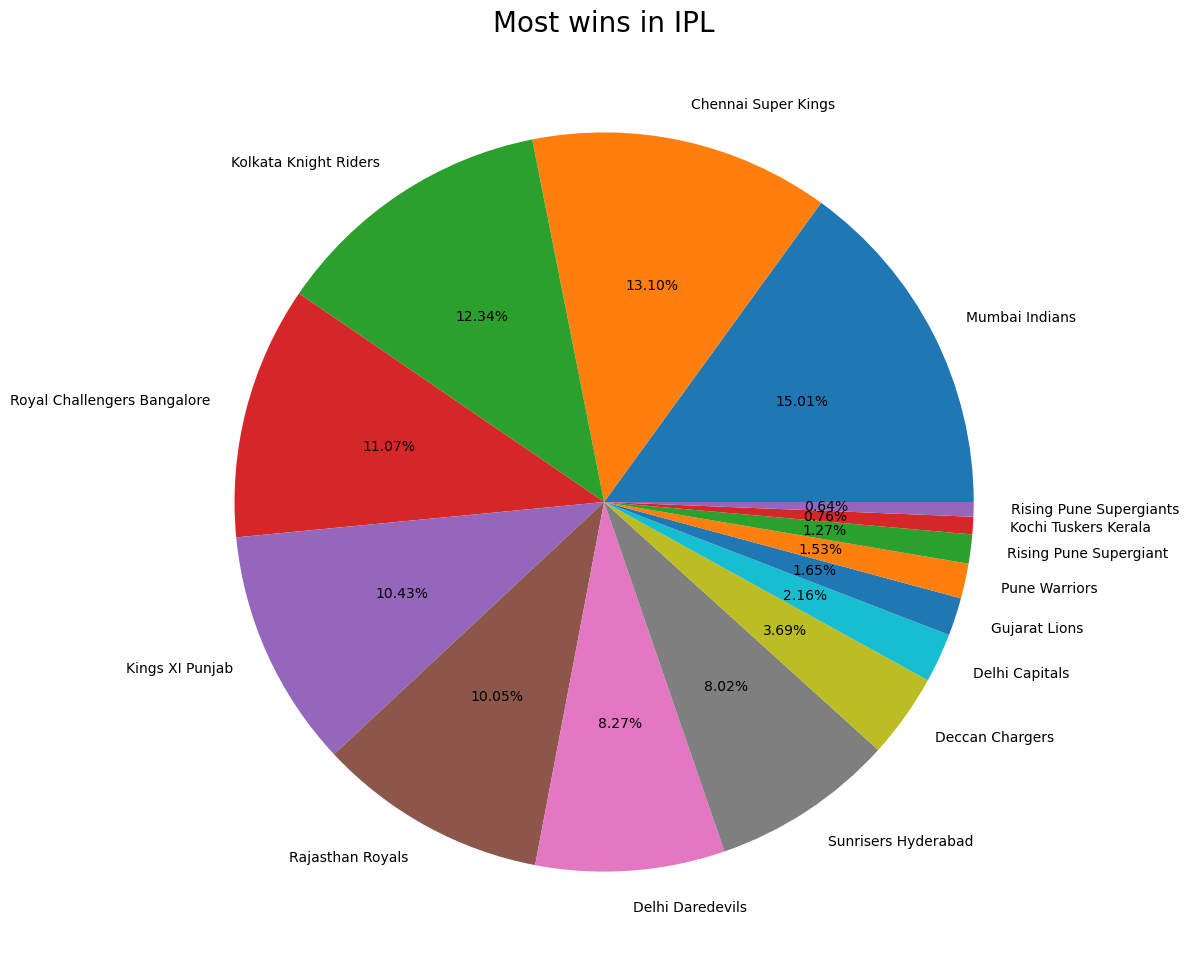

In [55]:
plt.subplots(figsize=(20,12))
plt.pie(count_wins,labels= labels,autopct='%1.2f%%')
plt.title('Most wins in IPL', fontsize=20)
plt.show()

In [59]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


<AxesSubplot:xlabel='toss_winner', ylabel='result_margin'>

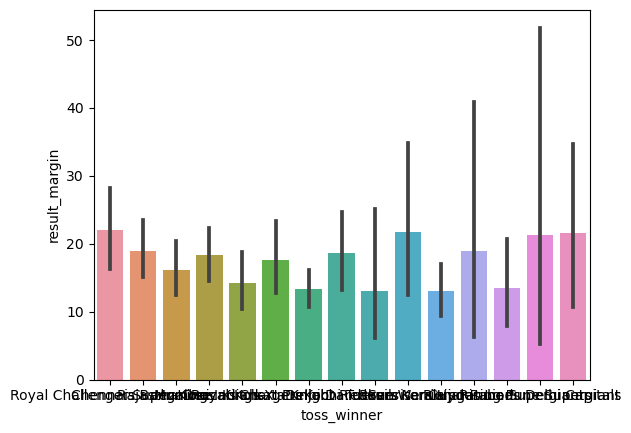

In [61]:
sns.barplot(data=df,x='toss_winner',y='result_margin')

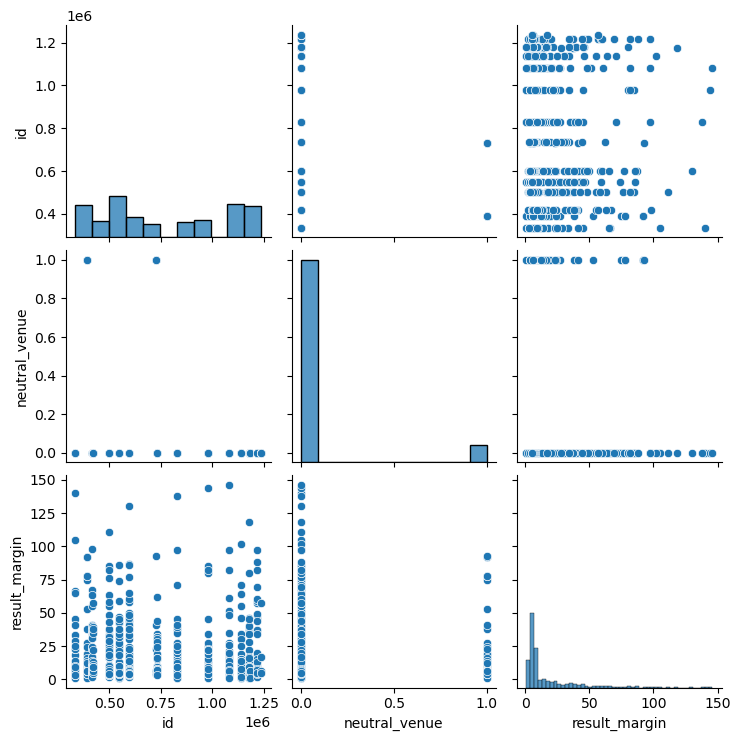

In [63]:
sns.pairplot(df)

In [72]:
teams=df['toss_winner'].unique()

decision_making = pd.DataFrame([],columns=['Toss Winner','Decision','Times'])

for id,element in enumerate(teams):
    temp_bat=df[(df['toss_winner']== element) & (df['toss_decision']=='bat')]
    temp_field=df[(df['toss_winner']== element) & (df['toss_decision']=='field')]    
    
    decision_making = decision_making.append({'Toss Winner': element,
                                              'Decision':'bat','Times': temp_bat['toss_winner'].count()},ignore_index=True)
    decision_making = decision_making.append({'Toss Winner': element,
                                              'Decision':'field','Times': temp_field['toss_winner'].count()},ignore_index=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7784\1067142954.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decision_making = decision_making.append({'Toss Winner': element,
C:\Users\admin\AppData\Local\Temp\ipykernel_7784\1067142954.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decision_making = decision_making.append({'Toss Winner': element,
C:\Users\admin\AppData\Local\Temp\ipykernel_7784\1067142954.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decision_making = decision_making.append({'Toss Winner': element,
C:\Users\admin\AppData\Local\Temp\ipykernel_7784\1067142954.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [73]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,23
1,Royal Challengers Bangalore,field,58
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,45
4,Rajasthan Royals,bat,33
5,Rajasthan Royals,field,50
6,Mumbai Indians,bat,44
7,Mumbai Indians,field,56
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


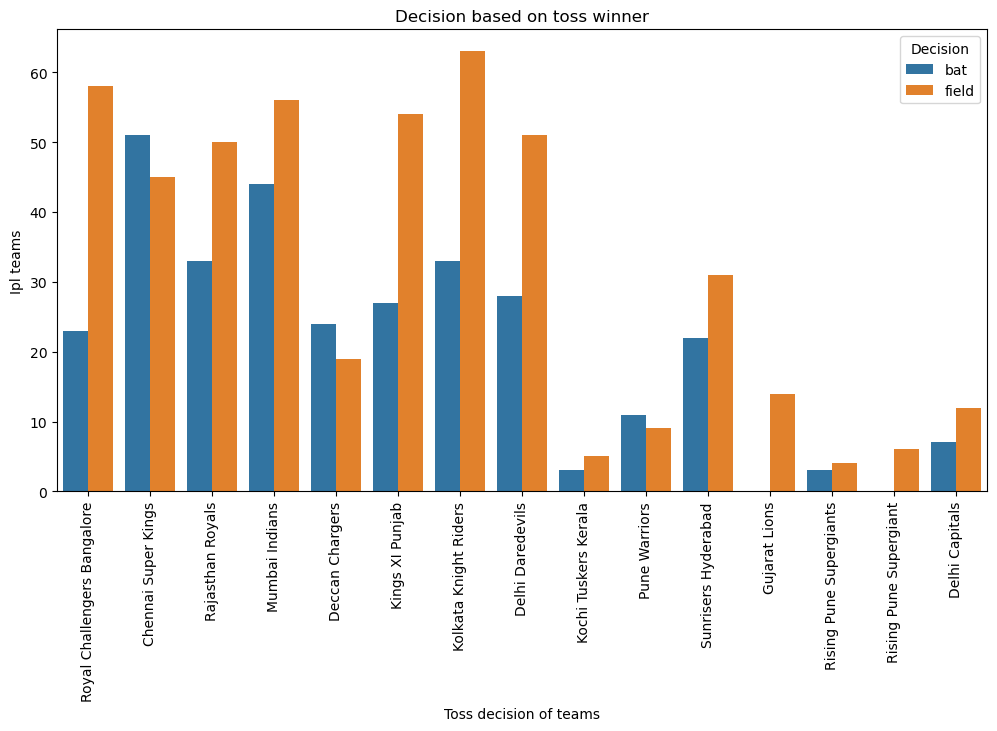

In [86]:
sns.barplot(data=decision_making,x='Toss Winner',y='Times',hue='Decision')
plt.title('Decision based on toss winner')
plt.xlabel('Toss decision of teams')
plt.ylabel('Ipl teams')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

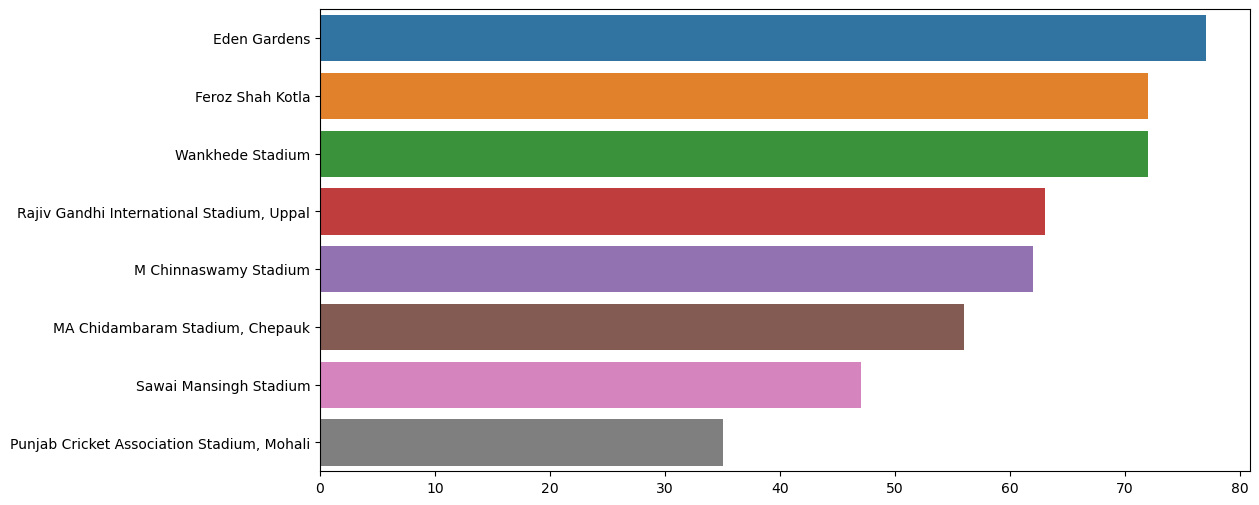

In [88]:
sns.barplot(x=df['venue'].value_counts().head(8).values,
           y=df['venue'].value_counts().head(8).index,data=df)

<AxesSubplot:>

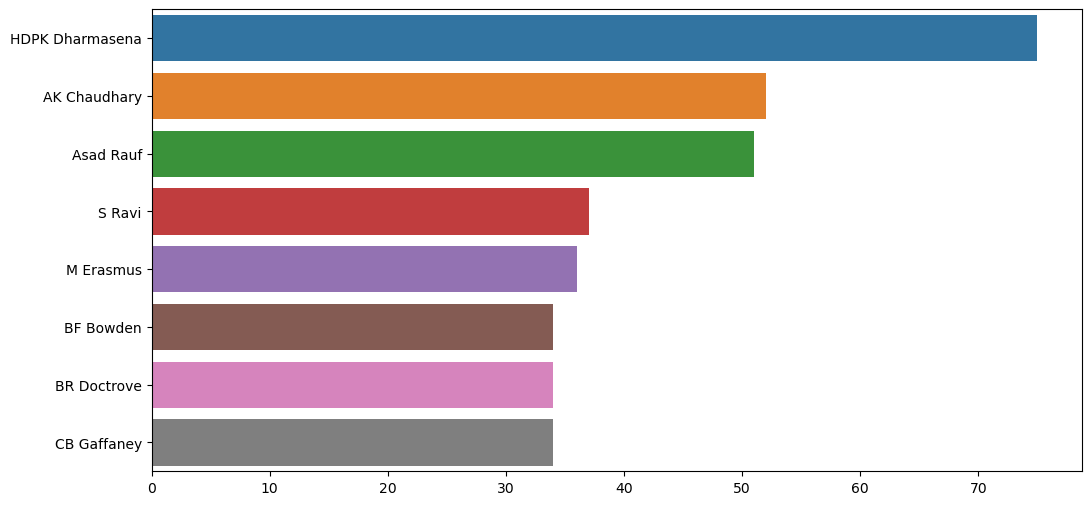

In [89]:
sns.barplot(x=df['umpire1'].value_counts().head(8).values,
           y=df['umpire1'].value_counts().head(8).index,data=df)

<AxesSubplot:>

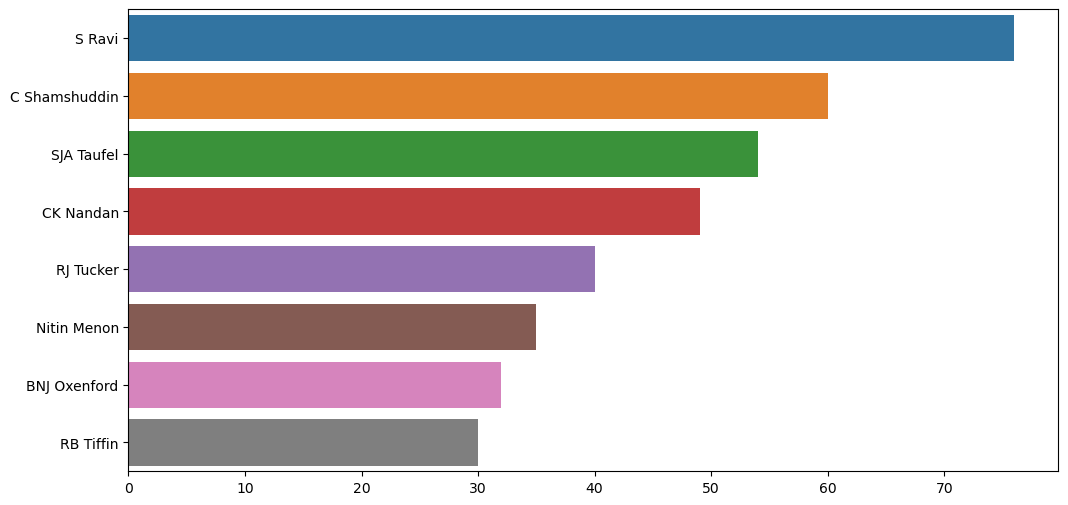

In [90]:
sns.barplot(x=df['umpire2'].value_counts().head(8).values,
           y=df['umpire2'].value_counts().head(8).index,data=df)